# Dataset Generation using Emulator

Start the emulator and save a screenshot containing the screen of the emulated device exactly.
Save the path to the screenshot in the variable below:

In [5]:
take_screenshot = False
use_android_screenshot = True
# TODO use_camera?

screenshot = 'AndroidScreenshot.png'

Run the cell below and check if the output matches the screen of the emulated device.

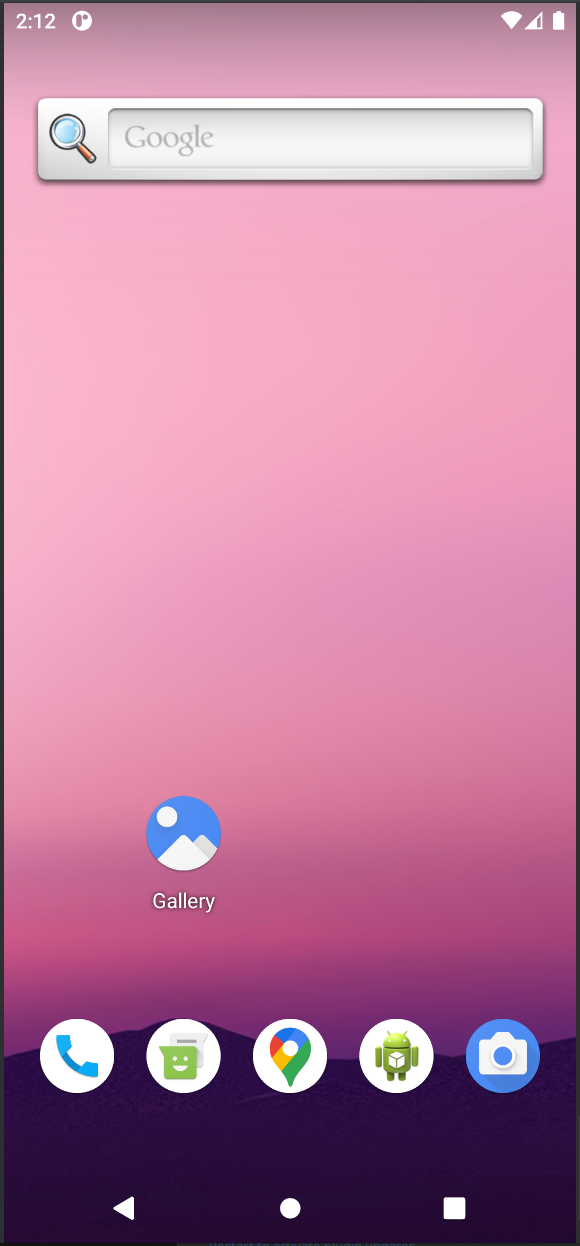

In [6]:
import pyautogui

box = pyautogui.locateOnScreen(screenshot, grayscale=True)

location = [box.left, box.top, box.width, box.height]

im = pyautogui.screenshot(region=location)
display(im)

Use the next cell to adjust the screenshot location and size if necessary.

[3861, 86, 571, 1240]


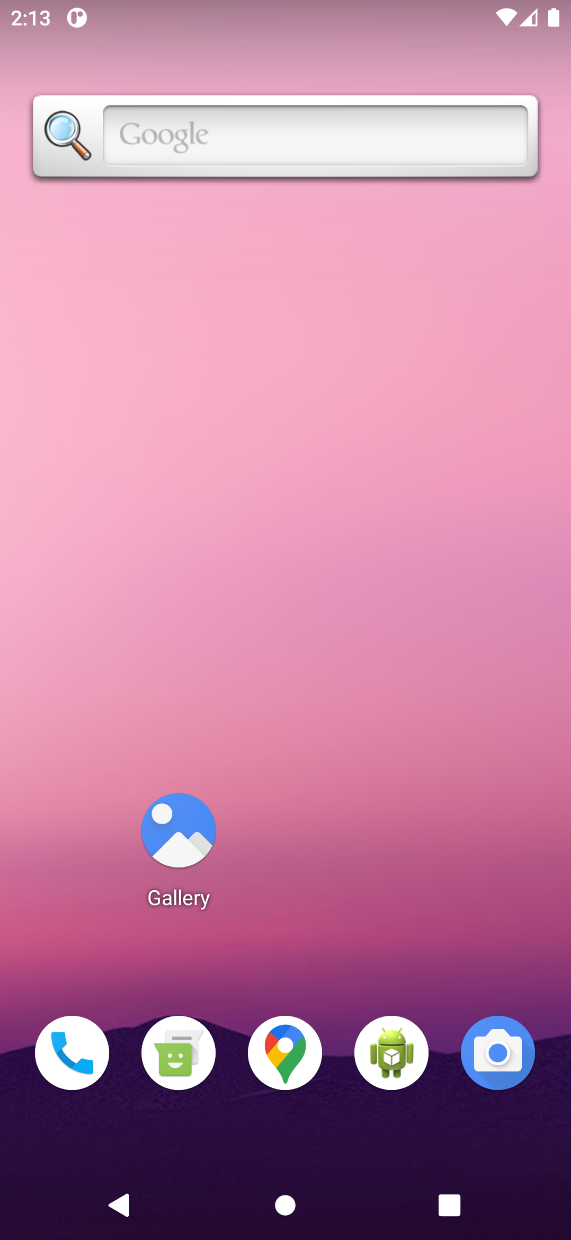

In [32]:
location[3] = location[3] + 1

im = pyautogui.screenshot(region=location)
print(location)
display(im)

Configure the parameters in the next cell before starting the dataset collection.

In [35]:
# Number of elements that will be collected.
DATASET_SIZE = 100
# Path of directory at which the dataset will be saved.
DATASET_PATH = "dataset/"
# IP adress of this computer.
HOST = "192.168.1.105"
# Port on which the server will listen.
PORT = 1281

Now, run the cell below. It will start a server, which the android application can then connect to and upload it's data. Thus, you can start the android application after starting the next cell. The dataset collection will happen automatically.

In [36]:
import json
import socketserver
import os
import base64
from io import BytesIO
from PIL import Image
from IPython.display import clear_output
import time

class Dataset:
    def __init__(self, size, path):
        self.total_size = size
        self.current_size = 0
        self.path = path
        # TODO: check path for validity and if dir is empty.
        
    def captureAndSaveImage(self, path: str):
        if take_screenshot:
            im = pyautogui.screenshot(path, region=location)
            # display(im)
        
    def saveAnnotations(self, path: str, data):
        
        data.pop("-1", None)
        for id_of_element, interactive_element in data.items():
            data.get(id_of_element).pop("mask", None)
        try:
            with open(path, "w") as file:
                file.write(json.dumps(data, indent=2))
        except Exception as e:
            print(e.message, e.args)
        
    def saveMasks(self, data):
        data = json.loads(data)
        for id_of_element, interactive_element in data.items():
            mask_bytes = base64.b64decode(interactive_element.get("mask"))
            mask_file = BytesIO(mask_bytes)
            mask = Image.open(mask_file)
            #display(mask)
            if id_of_element == "-1":
                if use_android_screenshot:
                    mask.save(self.path + f"{self.current_size}.png")
            else:
                mask.save(self.path + f"{self.current_size}_{id_of_element}.png")
            
            
    def handleCollection(self, data) -> bool:
        self.saveMasks(data)
        self.saveAnnotations(self.path + f"{self.current_size}.json", json.loads(data))
        self.current_size = self.current_size + 1
        print(f"Progress: {self.current_size}/{self.total_size}")
        if self.current_size >= self.total_size:
            print("Dataset collected.")
            return True
        return False


dataset = Dataset(DATASET_SIZE, DATASET_PATH)
    

class TCPHandler(socketserver.StreamRequestHandler):

    def handle(self):
        #print("client connected")
        # clear_output(wait=True)
        try:
            data = self.rfile.readline().strip()
            
            if json.loads(data).get("answer") == "ready":
                #print("received ready")
                dataset.captureAndSaveImage(dataset.path + f"{dataset.current_size}.png")

                response = {"answer": "masks"}
                self.wfile.write(json.dumps(response).encode("utf-8"))
                self.wfile.write(b"\n")
                # print("send masks")

                data = self.rfile.readline().strip()
                # print("received data")

                collectionFinished = dataset.handleCollection(data)

                if collectionFinished:
                    self.server._BaseServer__shutdown_request = True

            response = {"answer": "randomize"}
            self.wfile.write(json.dumps(response).encode())
        except Exception as e:
            print(e.message, e.args)

with socketserver.TCPServer((HOST, PORT), TCPHandler) as server:
    print("Starting server.")
    server.serve_forever()

Starting server.
client connected
received ready


----------------------------------------
Exception happened during processing of request from ('192.168.1.105', 51760)
Traceback (most recent call last):
  File "/tmp/ipykernel_31698/2217524778.py", line 81, in handle
    collectionFinished = dataset.handleCollection(data)
  File "/tmp/ipykernel_31698/2217524778.py", line 48, in handleCollection
    self.saveMasks(data)
  File "/tmp/ipykernel_31698/2217524778.py", line 34, in saveMasks
    data = json.loads(data)
  File "/home/benjamin/miniconda3/envs/test2/lib/python3.7/json/__init__.py", line 348, in loads
    return _default_decoder.decode(s)
  File "/home/benjamin/miniconda3/envs/test2/lib/python3.7/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/home/benjamin/miniconda3/envs/test2/lib/python3.7/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)

Dur

client connected
received ready


----------------------------------------
Exception happened during processing of request from ('192.168.1.105', 53178)
Traceback (most recent call last):
  File "/tmp/ipykernel_31698/2217524778.py", line 81, in handle
    collectionFinished = dataset.handleCollection(data)
  File "/tmp/ipykernel_31698/2217524778.py", line 48, in handleCollection
    self.saveMasks(data)
  File "/tmp/ipykernel_31698/2217524778.py", line 34, in saveMasks
    data = json.loads(data)
  File "/home/benjamin/miniconda3/envs/test2/lib/python3.7/json/__init__.py", line 348, in loads
    return _default_decoder.decode(s)
  File "/home/benjamin/miniconda3/envs/test2/lib/python3.7/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/home/benjamin/miniconda3/envs/test2/lib/python3.7/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)

Dur

client connected
received ready


----------------------------------------
Exception happened during processing of request from ('192.168.1.105', 45968)
Traceback (most recent call last):
  File "/tmp/ipykernel_31698/2217524778.py", line 81, in handle
    collectionFinished = dataset.handleCollection(data)
  File "/tmp/ipykernel_31698/2217524778.py", line 48, in handleCollection
    self.saveMasks(data)
  File "/tmp/ipykernel_31698/2217524778.py", line 34, in saveMasks
    data = json.loads(data)
  File "/home/benjamin/miniconda3/envs/test2/lib/python3.7/json/__init__.py", line 348, in loads
    return _default_decoder.decode(s)
  File "/home/benjamin/miniconda3/envs/test2/lib/python3.7/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/home/benjamin/miniconda3/envs/test2/lib/python3.7/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)

Dur

client connected
received ready


----------------------------------------
Exception happened during processing of request from ('192.168.1.105', 54346)
Traceback (most recent call last):
  File "/tmp/ipykernel_31698/2217524778.py", line 81, in handle
    collectionFinished = dataset.handleCollection(data)
  File "/tmp/ipykernel_31698/2217524778.py", line 48, in handleCollection
    self.saveMasks(data)
  File "/tmp/ipykernel_31698/2217524778.py", line 34, in saveMasks
    data = json.loads(data)
  File "/home/benjamin/miniconda3/envs/test2/lib/python3.7/json/__init__.py", line 348, in loads
    return _default_decoder.decode(s)
  File "/home/benjamin/miniconda3/envs/test2/lib/python3.7/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/home/benjamin/miniconda3/envs/test2/lib/python3.7/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)

Dur

client connected
received ready


----------------------------------------
Exception happened during processing of request from ('192.168.1.105', 58358)
Traceback (most recent call last):
  File "/tmp/ipykernel_31698/2217524778.py", line 81, in handle
    collectionFinished = dataset.handleCollection(data)
  File "/tmp/ipykernel_31698/2217524778.py", line 48, in handleCollection
    self.saveMasks(data)
  File "/tmp/ipykernel_31698/2217524778.py", line 34, in saveMasks
    data = json.loads(data)
  File "/home/benjamin/miniconda3/envs/test2/lib/python3.7/json/__init__.py", line 348, in loads
    return _default_decoder.decode(s)
  File "/home/benjamin/miniconda3/envs/test2/lib/python3.7/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/home/benjamin/miniconda3/envs/test2/lib/python3.7/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)

Dur

client connected
received ready


----------------------------------------
Exception happened during processing of request from ('192.168.1.105', 44480)
Traceback (most recent call last):
  File "/tmp/ipykernel_31698/2217524778.py", line 81, in handle
    collectionFinished = dataset.handleCollection(data)
  File "/tmp/ipykernel_31698/2217524778.py", line 48, in handleCollection
    self.saveMasks(data)
  File "/tmp/ipykernel_31698/2217524778.py", line 34, in saveMasks
    data = json.loads(data)
  File "/home/benjamin/miniconda3/envs/test2/lib/python3.7/json/__init__.py", line 348, in loads
    return _default_decoder.decode(s)
  File "/home/benjamin/miniconda3/envs/test2/lib/python3.7/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/home/benjamin/miniconda3/envs/test2/lib/python3.7/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)

Dur

client connected
received ready
Progress: 1/100
client connected
received ready
Progress: 2/100
client connected
received ready
Progress: 3/100
client connected
received ready
Progress: 4/100
client connected
received ready
Progress: 5/100
client connected
received ready
Progress: 6/100
client connected
received ready
Progress: 7/100
client connected
received ready
Progress: 8/100
client connected
received ready
Progress: 9/100
client connected
received ready
Progress: 10/100
client connected
received ready
Progress: 11/100
client connected
received ready
Progress: 12/100
client connected
received ready
Progress: 13/100
client connected
received ready
Progress: 14/100
client connected
received ready
Progress: 15/100
client connected
received ready
Progress: 16/100
client connected
received ready
Progress: 17/100
client connected
received ready
Progress: 18/100
client connected
received ready
Progress: 19/100
client connected
received ready
Progress: 20/100
client connected
received rea